**Importing the Dataset**




In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d janiobachmann/bank-marketing-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
bank-marketing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '/content/bank-marketing-dataset.zip'

Archive:  /content/bank-marketing-dataset.zip
replace bank.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('bank.csv')
df.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#df.describe()

##Description of the data: Categorical Features
* marital: marital status (categorical: 'divorced','married','single','unknown';
note: 'divorced' means divorced or widowed)
* education: (categorical: primary, secondary, tertiary and unknown)
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')

* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



In [ ]:
col_list = df.columns.values.tolist()
print(col_list)


['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


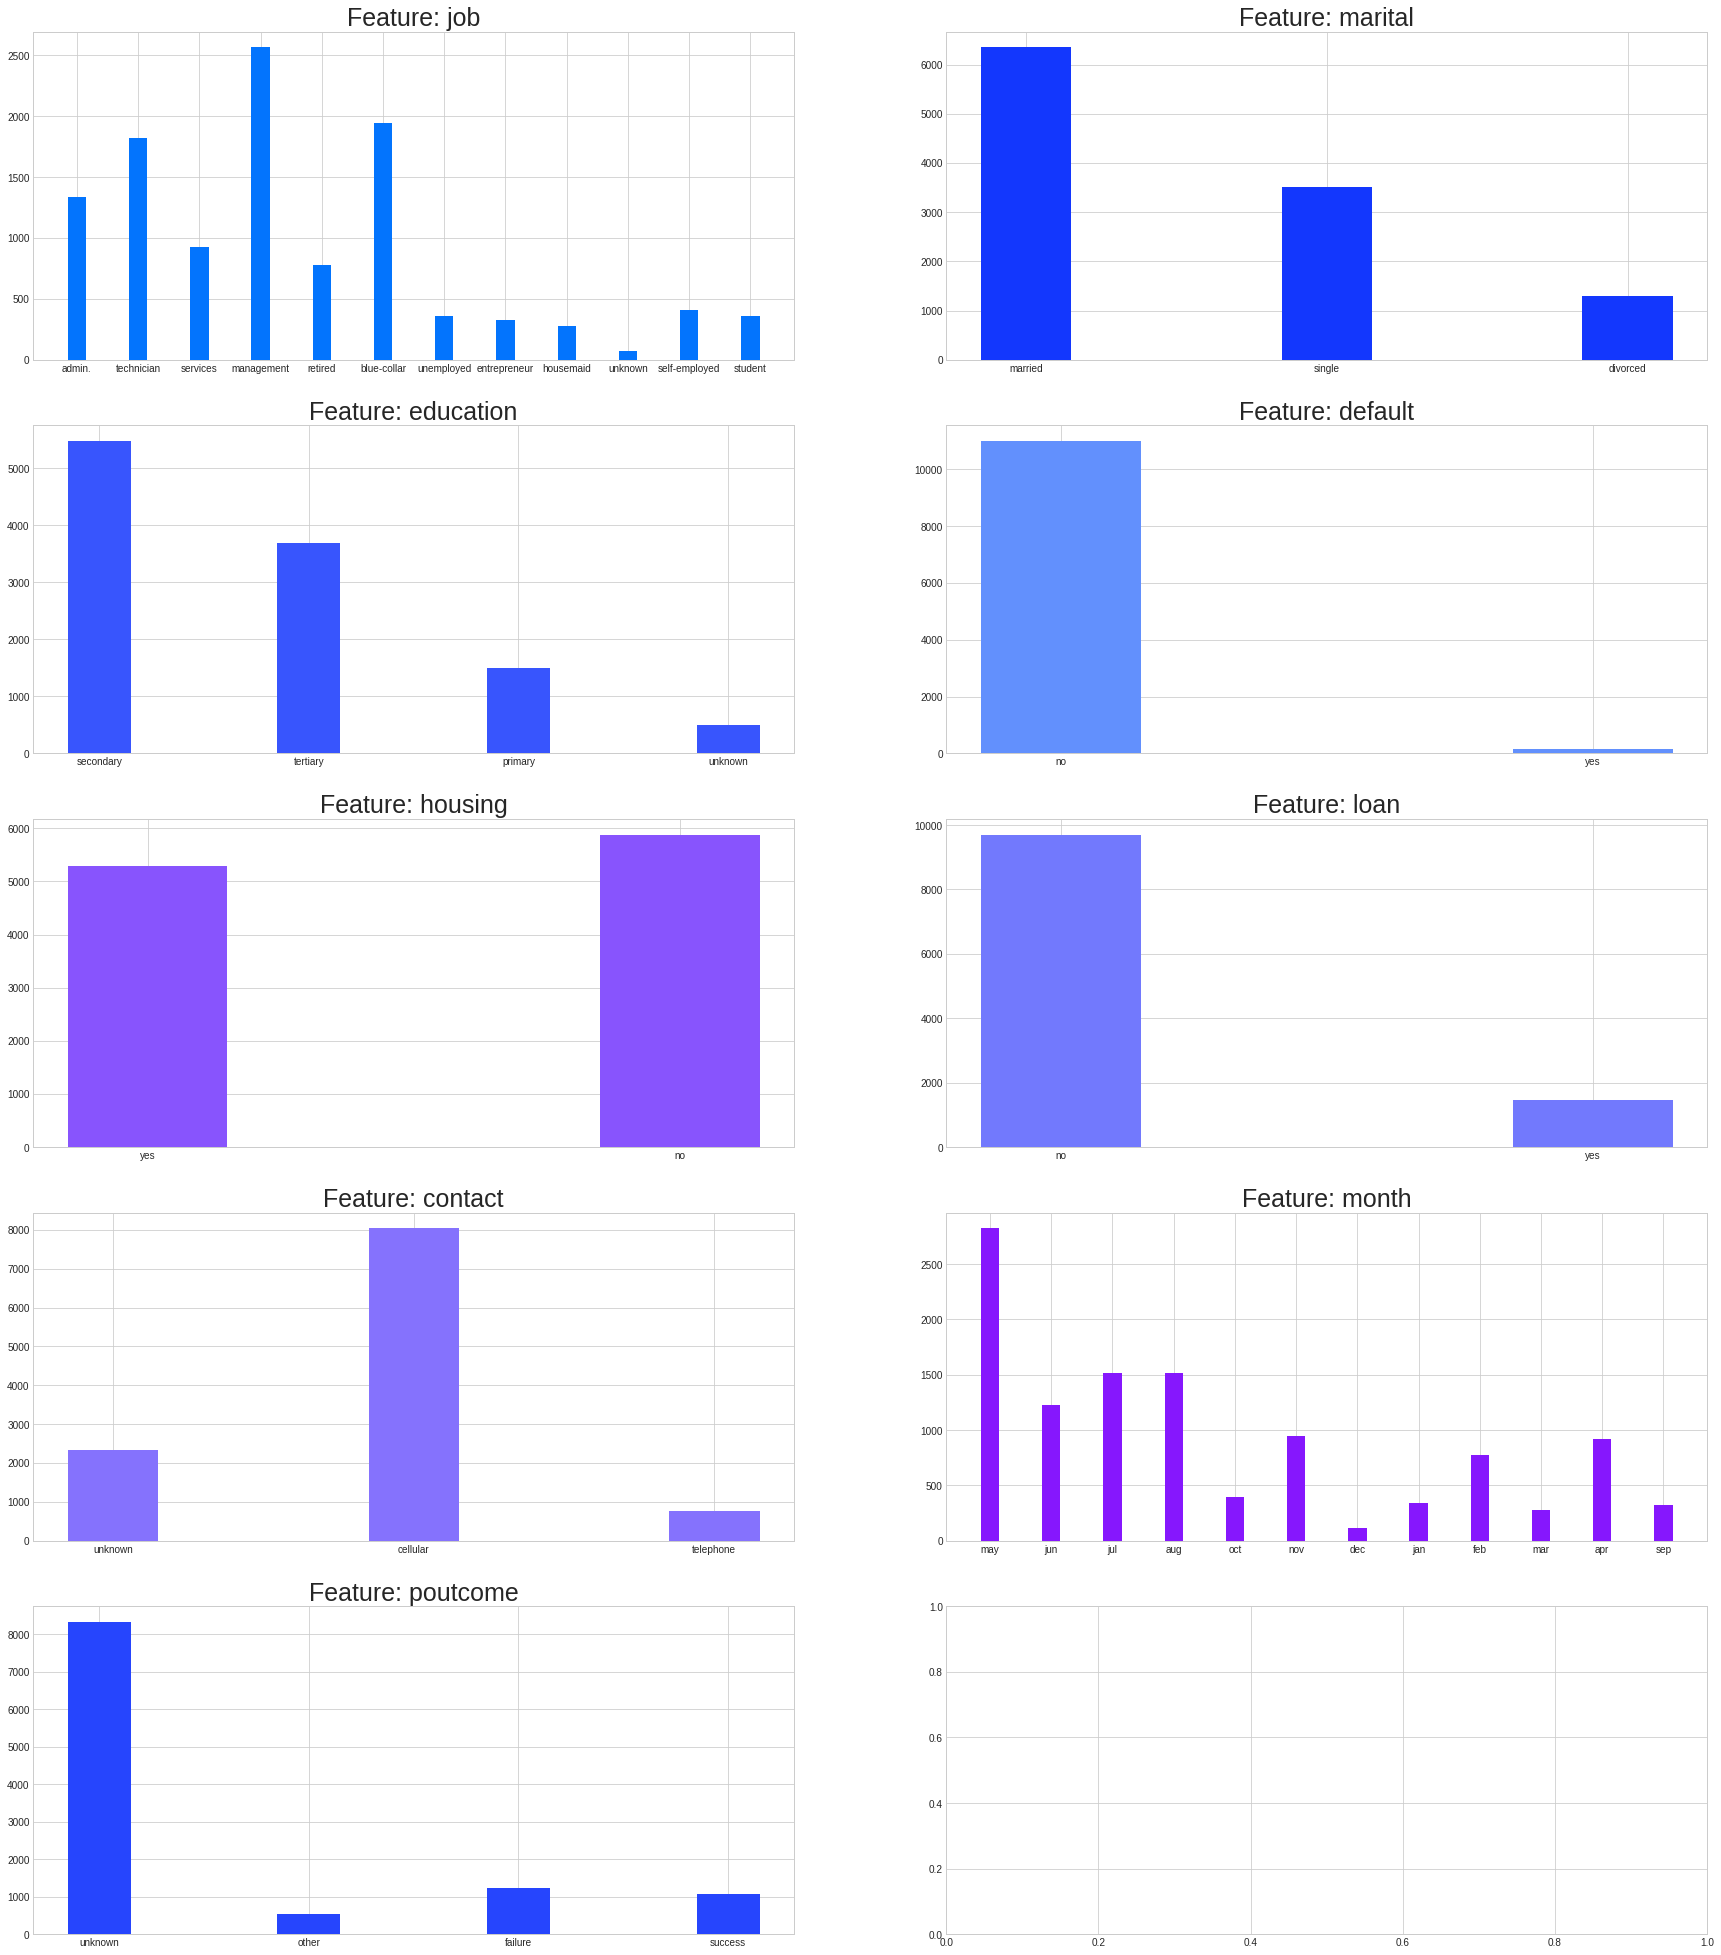

In [ ]:
from collections import Counter
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(5,2 , figsize=(30, 35))
axs = axs.ravel()

for i in range(len(cat_features)):
  a = dict(Counter(df[cat_features[i]]))
  color = '#'+str(np.random.randint(0, 10)) + str(np.random.randint(10, 100))+str(np.random.randint(0, 10))+('FD')
  axs[i].bar(list(a.keys()), list(a.values()), color=color, width = 0.3)
  axs[i].set_title(f'Feature: {cat_features[i]}', fontsize =25)
plt.show()


##Description of the data: Numerical Features
* age: (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* balance: Balance of the individual.
* day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric).
 Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: 'yes','no')

**Histogram for the Non-Categorical Data**

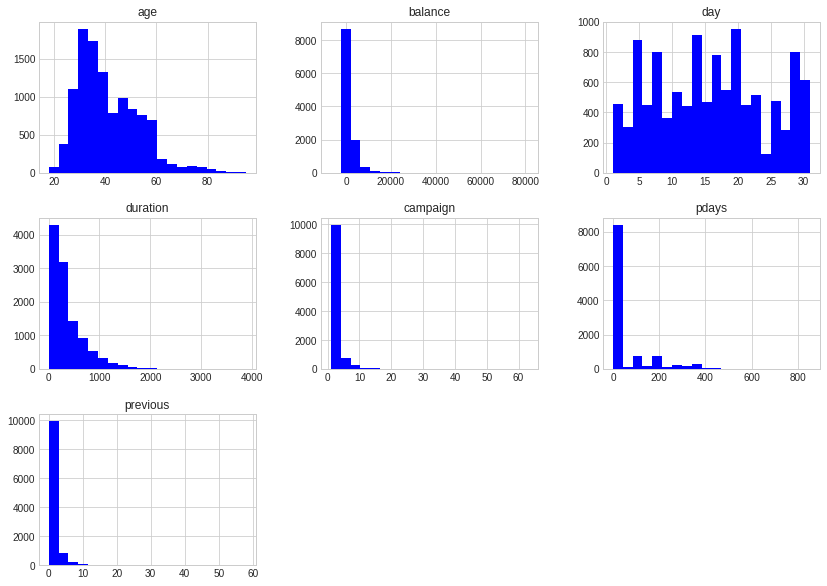

In [ ]:
plt.style.use('seaborn-whitegrid')
#df2 = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]
df.hist(bins=20, figsize=(14,10), color='blue')
plt.show()

<AxesSubplot:xlabel='deposit', ylabel='count'>

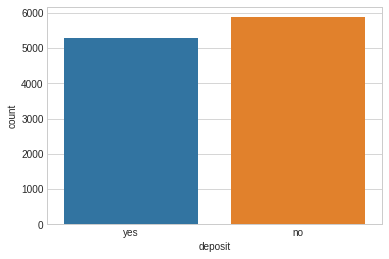

In [ ]:
# checking if the data is balanced

#cols= ["#6daa9f","#774571"]
sns.countplot(x= df["deposit"]) #palette= cols

In [ ]:
col_list = df.columns.values.tolist()
print(col_list)
df.info()

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit  

In [ ]:
my_list = df.columns.values.tolist()
print(my_list)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


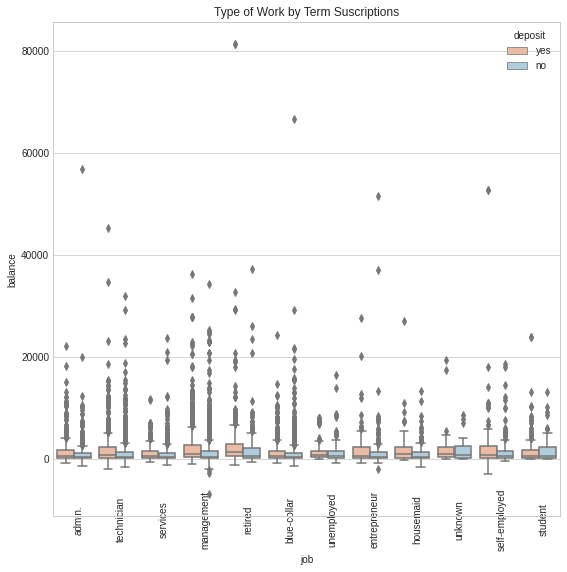

In [ ]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
#ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
#ax3 = fig.add_subplot(212)

#g = sns.boxplot(x="default", y="balance", hue="deposit",
                    #data=df, palette="muted", ax=ax1)

#g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

#g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

#g2.set_title("Distribution of Balance by Education")


plt.show()

In [ ]:
# divind ethe dataset into categorical and non-categorical data

df_cat = df[['job', 'marital', 'education', 'default',  'housing', 'loan', 'contact', 'month', 'poutcome']].values #.reshape(-1, 1) # makes it an array
df_non_cat = df[['age', 'balance','day',  'duration', 'campaign', 'pdays', 'previous']]

##Correlation: Numerical Features
For this, the deposit column is converted into ones and zeros.

In [ ]:
# column_name =["deposit"]
# y_int = pd.DataFrame([1 if item == 'yes' else 0 for item in df['deposit']], columns=column_name)
# frames = [df_non_cat, y_int]
#data_nc = pd.concat(frames, axis =1)

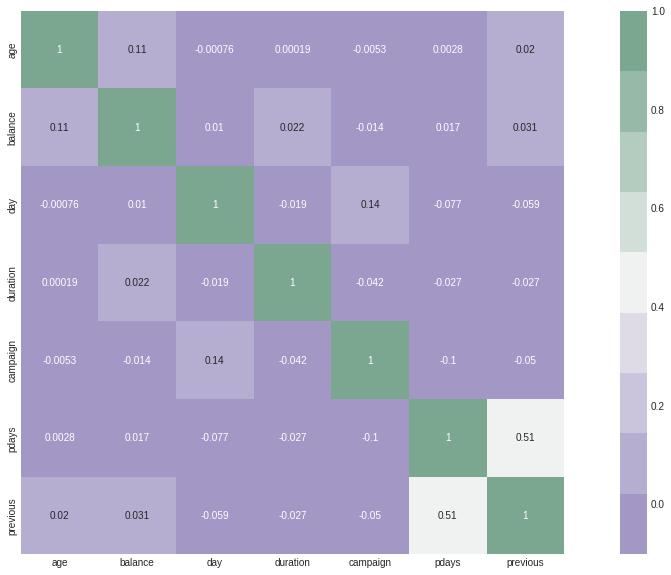

In [ ]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df_non_cat.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

The featues pdays and previous have high correlation. So, only pdays will be chosen for training the model.

In [ ]:
df_non_cat2 = df_non_cat.drop(labels = 'pdays', axis =1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:

enc = OneHotEncoder()
df_cat1 = enc.fit_transform(df_cat).toarray()
print(df_cat1.shape)

df2 = pd.DataFrame(df_cat1)
print(f'the shape after one-hot encoding is {df_cat1.shape}')
df2.head(6)

(11162, 44)
the shape after one-hot encoding is (11162, 44)


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# concatenating the whole data back again

data = np.concatenate([df_cat1, df_non_cat], axis=1)
data_df = pd.DataFrame(data)
print(data.shape)

(11162, 51)


In [ ]:
# one-hot encoding for the output
enc = OneHotEncoder()
Y = enc.fit_transform(df[['deposit']]).toarray()
print(Y.shape)

(11162, 2)


In [ ]:
# cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
# corrmat = data_df.corr()
# plt.subplots(figsize=(20,20))
# sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [ ]:
#assigning values to features as X and target as y
X=data
Y=Y

x_train, x_test,  y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## ANN Model

In [ ]:
# Create a neural network classifier
clf1 = MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32), max_iter=400, batch_size=30)

# Train the classifier
history = clf1.fit(x_train, y_train)

# Evaluate the classifier


score1= clf1.score(x_train, y_train)
print("Train Accuracy:", score1)

score2 = clf1.score(x_test, y_test)
print("Test Accuracy:", score2)

Train Accuracy: 0.8479457314731857
Test Accuracy: 0.8241266049567035


Loss history: [3.7691241556714106, 1.9028548127112102, 1.8195491872020466, 1.6094262303188418, 1.703809713298628, 1.2768060753067143, 1.4029671088235078, 1.1548492701054627, 1.1380015010985833, 1.147548408919736, 1.0611851219392805, 0.9629580396400171, 0.9867194729684429, 1.0904001167799244, 1.0693948488658664, 0.9557240171348742, 0.9421003246369327, 0.9092884705253073, 0.8895103738178256, 0.8940998453510176, 0.8833029710688102, 0.8678891050497873, 0.8819007736293974, 0.8749047226395867, 0.9098023612113496, 0.8611613456255821, 0.8837856062352197, 0.8726462511785583, 0.8843093449810783, 0.8307196938602761, 0.8327391406481811, 0.8519502795136168, 0.837097693262992, 0.8078910710746685, 0.8284180433849264, 0.8076087611852689, 0.8432984836378238, 0.8169416496589286, 0.8288838467549254, 0.7998663650674875, 0.7900800585321011, 0.7920627785639919, 0.7935675095705625, 0.8099484724986118, 0.8195263759376722, 0.8536332095707374, 0.795102876057372, 0.7839924601906861, 0.7922980364246901, 0.7917779

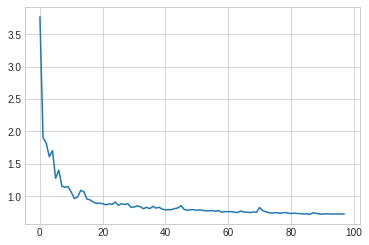

In [ ]:
loss_history = clf1.loss_curve_

# Print the loss history
print("Loss history:", loss_history)

plt.figure;
plt.plot(loss_history)

## Random Forest Model

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators = 150)
clf2.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf2.predict(x_test)

# using metrics module for accuracy calculation

score3 = clf2.score(x_train, y_train)
print("Train Accuracy:", score3)

score4 = clf2.score(x_test, y_test)
print("Test Accuracy:", score4)

Train Accuracy: 1.0
Test Accuracy: 0.8501045088085996


In [ ]:
y_pred = clf.predict(x_test)
# yes is [0, 1]

m, n = y_pred.shape

y_pred_cat = []
y_test_cat = []
for i in range(m):
  if y_pred[i][0] == 0:
    y_pred_cat.append('yes')
  else:
    y_pred_cat.append('no')
for i in range(m):
  if y_test[i][0] == 0:
    y_test_cat.append('yes')
  else:
    y_test_cat.append('no')

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cat, y_pred_cat)


# Print confusion matrix
print("Confusion matrix:")
print(cm)

ValueError: ignored

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

pca = PCA(n_components=30)

X_pca_tr = pca.fit_transform(x_train)
X_pca_te = pca.fit_transform(x_test)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed data
print("Transformed data:\n", X_pca)



In [ ]:
# Create a neural network classifier

clf = MLPClassifier(hidden_layer_sizes=(16, 16, 16, 16), max_iter=100, batch_size=20,  )

# Train the classifier
history = clf.fit(X_pca_tr, y_train)

# Evaluate the classifier
score = clf.score(X_pca_te, y_test)
print("Accuracy:", score)